<a href="https://colab.research.google.com/github/Dicti93/MLSEM/blob/master/4.%20EDA/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
# Librarie
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LassoCV, ElasticNetCV
from sklearn.feature_selection import mutual_info_classif

# Display Settings
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.width', 240)

In [65]:
!wget 'https://raw.githubusercontent.com/Dicti93/MLSEM/master/3.%20Data%20Preparation/clean_data.csv' -O clean_data.csv

# Load the downloaded CSV files into pandas DataFrames
data = pd.read_csv('clean_data.csv')

--2024-05-16 21:19:58--  https://raw.githubusercontent.com/Dicti93/MLSEM/master/3.%20Data%20Preparation/clean_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 215867 (211K) [text/plain]
Saving to: ‘clean_data.csv’

clean_data.csv      100%[===================>] 210.81K  --.-KB/s    in 0.04s   

2024-05-16 21:19:58 (5.84 MB/s) - ‘clean_data.csv’ saved [215867/215867]



In [66]:
X = data.drop('Diagnosis', axis=1)  # Features
y = data['Diagnosis']               # Target variable

In [67]:
# Variable Groups
demographic = ['Age', 'Sex', 'Height', 'Weight', 'BMI', 'Length_of_Stay']

scoring = ['Alvarado_Score', 'Paedriatic_Appendicitis_Score']

clinical = ['Peritonitis', 'Migratory_Pain', 'Lower_Right_Abd_Pain', 'Contralateral_Rebound_Tenderness',
            'Ipsilateral_Rebound_Tenderness', 'Coughing_Pain', 'Psoas_Sign', 'Nausea', 'Loss_of_Appetite',
            'Body_Temperature', 'Dysuria', 'Stool']

laboratory = ['WBC_Count', 'RBC_Count', 'Hemoglobin', 'RDW', 'Thrombocyte_Count',
             'Neutrophil_Percentage', 'Neutrophilia', 'Segmented_Neutrophils',
             'CRP', 'Ketones_in_Urine', 'RBC_in_Urine', 'WBC_in_Urine']

ultrasound = ['US_Performed', 'Appendix_on_US', 'Appendix_Diameter', 'Free_Fluids', 'Appendix_Wall_Layers',
              'Target_Sign', 'Perfusion', 'Surrounding_Tissue_Reaction','Pathological_Lymph_Nodes',
              'Bowel_Wall_Thickening', 'Ileus', 'Coprostasis', 'Meteorism', 'Enteritis', 'Appendicolith',
              'Perforation', 'Appendicular_Abscess', 'Conglomerate_of_Bowel_Loops', 'Gynecological_Findings']

In [68]:
X[demographic].describe()

,Age,Sex,Height,Weight,BMI,Length_of_Stay
count,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000
mean,11.341831,0.517254,147.963226,43.165007,286.866080,4.285897
std,3.529811,0.499704,19.498782,17.377129,7484.227448,2.571048
min,0.000000,0.000000,53.000000,3.960000,7.830000,1.000000
25%,9.197500,0.000000,137.000000,29.500000,15.780000,3.000000
50%,11.440000,1.000000,149.306250,41.400000,18.070000,3.000000
75%,14.040000,1.000000,162.075000,54.000000,21.057500,5.000000
max,18.360000,1.000000,192.000000,103.000000,209041.950113,28.000000


Demographic information of 780 patients:

- **Age**: The mean age is 11.34 years. The youngest patient is a newborn, and the oldest is approximately 18.36 years old.
  
- **Sex**: 51.7% of the dataset are male.
  
- **Height**: The average height is around 147.96 cm.
  
- **Weight**: The mean weight is roughly 43.17 kg. The lightest individual weighs about 3.96 kg, while the heaviest weighs 103 kg.
  
- **BMI**: The mean BMI is approximately 286.87. The BMI values range from as low as 7.83 to 209041.95 (outlier).
  
- **Length of Stay**: On average, patients stay for approximately 4.29 days. The shortest stay is 1 unit of time, while the longest is 28 units.

## Distribution of Diagnosis

<Axes: xlabel='Diagnosis', ylabel='count'>

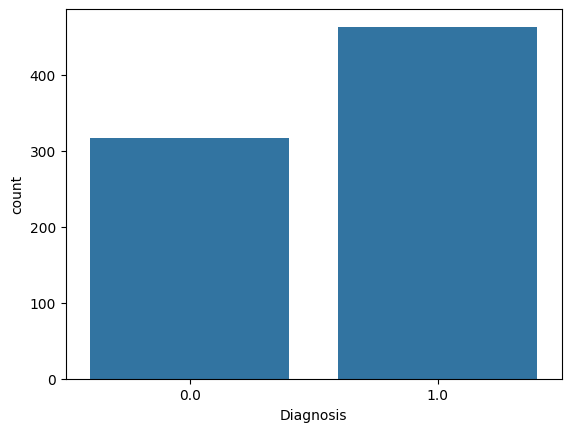

In [69]:
sns.countplot(x='Diagnosis', data=data)

In [70]:
prop = y.value_counts()[1] / len(y)

print("Proportion of Appendicitis:", round(prop,2))
print("Proportion of non Appendicitis:", round(1-prop,2))

Proportion of Appendicitis: 0.59
Proportion of non Appendicitis: 0.41


There is a slight imbalance in the dataset. Approximately 59% of the patients have appendicitis.

## Correlation Analysis

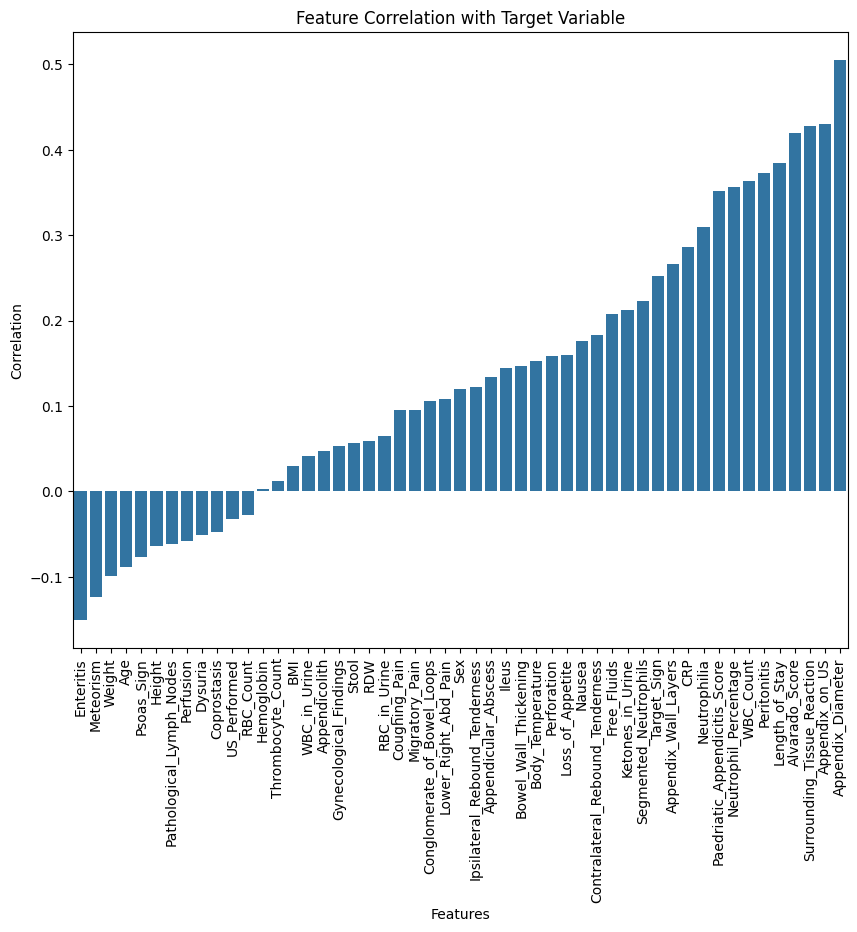

In [71]:
# Variable correlation with target variable
feature_target_corr = X.corrwith(data['Diagnosis'])
sorted_corr = feature_target_corr.sort_values()

plt.figure(figsize=(10, 8))
sns.barplot(x=sorted_corr.index, y=sorted_corr.values)
plt.title('Feature Correlation with Target Variable')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()

- Appendix_Diameter, Appendix_on_US, Surrounding_Tissue_Reaction, Alvarado_Score show the strongest correlation with the target variable. These variables are probably very important to predict pediatric appendicitis.
- Age, Weight, Psoas_Sign, Ileus, Meteorism, Enteritis: Weak to moderate negative correlations.

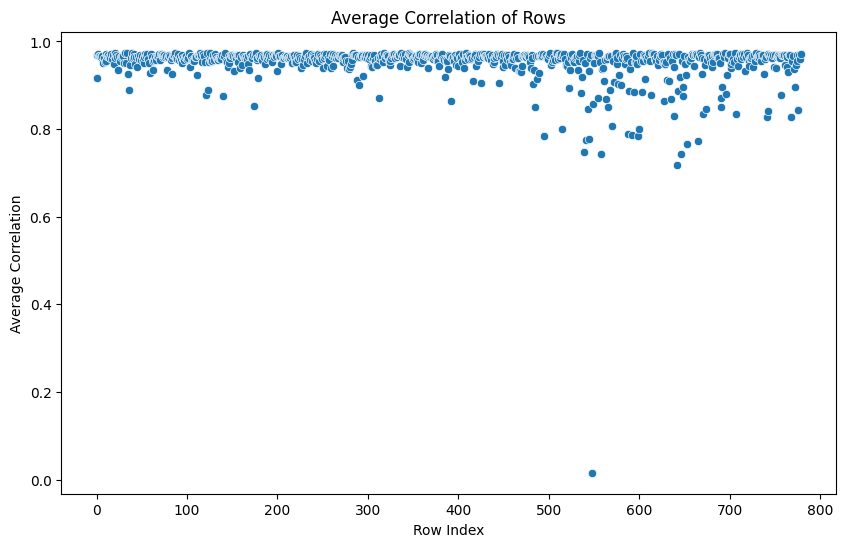

In [72]:
# Average correlation of rows
data_transposed = data.transpose()
correlation_rows = data_transposed.corr()
mean_correlation_rows = correlation_rows.mean(axis=1)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=mean_correlation_rows.index, y=mean_correlation_rows, data=data)
plt.xlabel('Row Index')
plt.ylabel('Average Correlation')
plt.title('Average Correlation of Rows')
plt.show()

The plot shows the average correlation of patients, suggesting that the dataset contains little variability among its observations. Patients share similar patterns and characteristics.

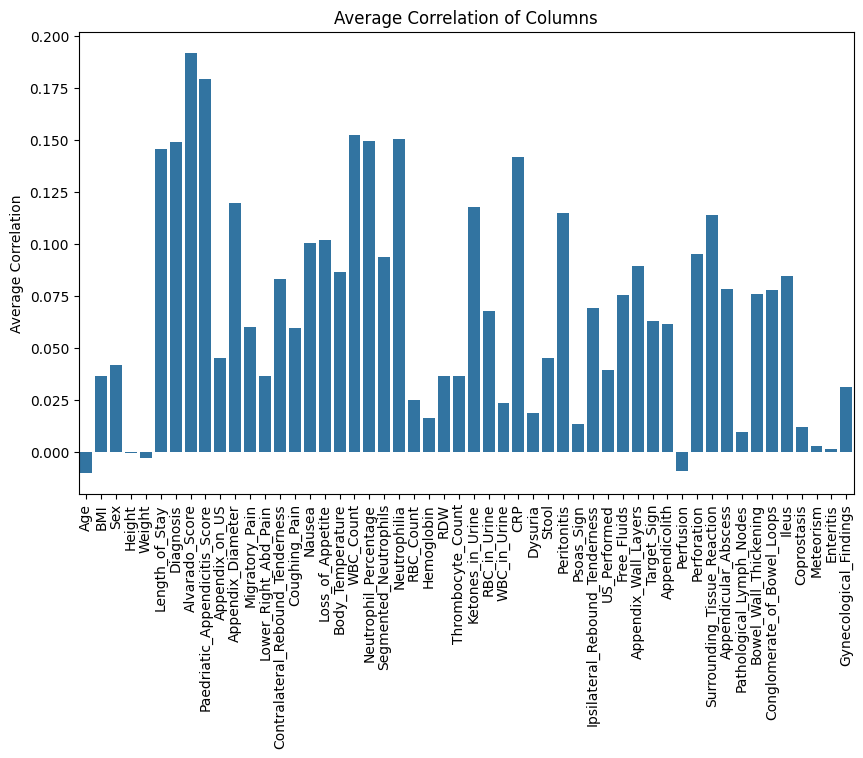

In [73]:
# Average correlation of columns
correlation_columns = data.corr()
mean_correlation_columns = correlation_columns.mean(axis=1)
mean_correlation_columns = mean_correlation_columns.reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='index', y=0, data=mean_correlation_columns)
plt.xlabel('')
plt.ylabel('Average Correlation')
plt.title('Average Correlation of Columns')
plt.xticks(rotation=90)
plt.show()

The plot illustrates the average correlation of variables in the dataset. The features are only slightly correlated with each other, with "Alvarado Score", displaying the highest average correlation the all other variables.

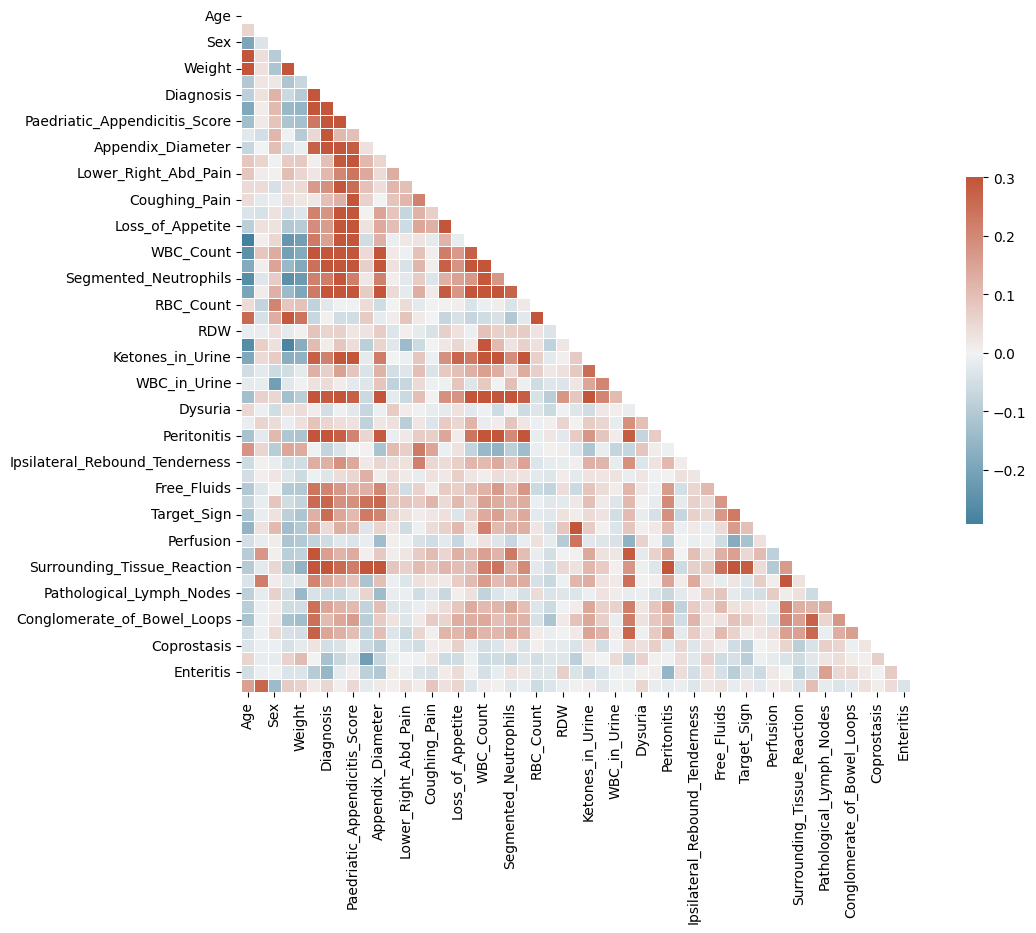

In [74]:
# Variable Correlation Matrix
corr = data.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

The plot illustrates the correlations between individual variables. The highest correlation peaks at approximately 0.3, while the lowest, negative correlation takes on a value of approximately 0.25.

# Supervised Feature Selection

As supervised methods of feature selection, we primarily utilized mutual information, which is particularly beneficial for classification tasks. This method calculates variable importance based on the concept of entropy. For each subset, we selected the most significant features using this approach.

## Mutual Information (Demographic + Scoring + Clinical)

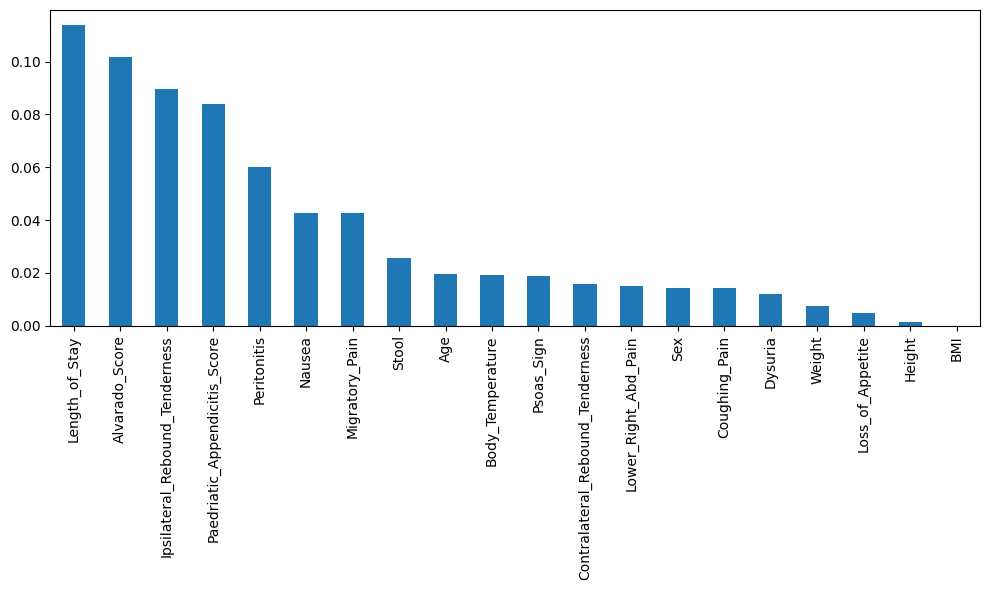

In [75]:
data_restricted = X[demographic + scoring + clinical]

importances = mutual_info_classif(data_restricted, y, random_state=123)
feat_importances = pd.Series(importances, X[demographic + scoring + clinical].columns[0:len(data_restricted.columns)])

feat_importances_sorted = feat_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feat_importances_sorted.plot(kind="bar")
plt.tight_layout()
plt.show()

In [76]:
feat_importances_sorted = feat_importances.sort_values(ascending=False)
feat_importances_sorted.head(10)

Length_of_Stay                    0.113815
Alvarado_Score                    0.101710
Ipsilateral_Rebound_Tenderness    0.089431
Paedriatic_Appendicitis_Score     0.084074
Peritonitis                       0.059917
Nausea                            0.042721
Migratory_Pain                    0.042608
Stool                             0.025681
Age                               0.019549
Body_Temperature                  0.019108
dtype: float64

For modeling we chose the following variables:
- Length_of_Stay
- Alvarado_Score
- Ipsilateral_Rebound_Tenderness
- Paedriatic_Appendicitis_Score
- Peritonitis
- Nausea
- Migratory_Pain

## Mutual Information (Demographic + Scoring + Clinical + Laboratory)

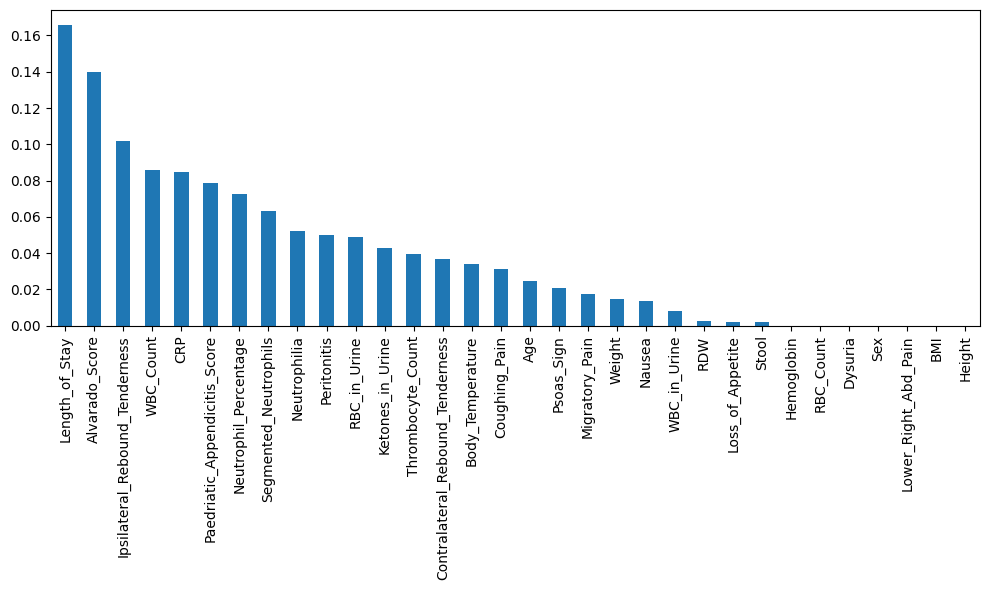

In [77]:
data_partially_restricted = X[demographic + scoring + clinical + laboratory]

importances = mutual_info_classif(data_partially_restricted, y, random_state=123)
feat_importances = pd.Series(importances, X[demographic + scoring + clinical + laboratory].columns[0:len(data_partially_restricted.columns)])

feat_importances_sorted = feat_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feat_importances_sorted.plot(kind="bar")
plt.tight_layout()
plt.show()

In [78]:
feat_importances_sorted = feat_importances.sort_values(ascending=False)
feat_importances_sorted.head(15)

Length_of_Stay                      0.165754
Alvarado_Score                      0.140016
Ipsilateral_Rebound_Tenderness      0.101721
WBC_Count                           0.086058
CRP                                 0.084621
Paedriatic_Appendicitis_Score       0.078398
Neutrophil_Percentage               0.072821
Segmented_Neutrophils               0.063118
Neutrophilia                        0.052288
Peritonitis                         0.049775
RBC_in_Urine                        0.048842
Ketones_in_Urine                    0.043072
Thrombocyte_Count                   0.039316
Contralateral_Rebound_Tenderness    0.036913
Body_Temperature                    0.033845
dtype: float64

For modeling we chose the following variables:
- Length_of_Stay
- Alvarado_Score
- Ipsilateral_Rebound_Tenderness
- WBC_Count
- CRP
- Paedriatic_Appendicitis_Score
- Neutrophil_Percentage
- Segmented_Neutrophils

## Mutual Information (Demographic + Scoring + Clinical + Laboratory + Ultrasound)

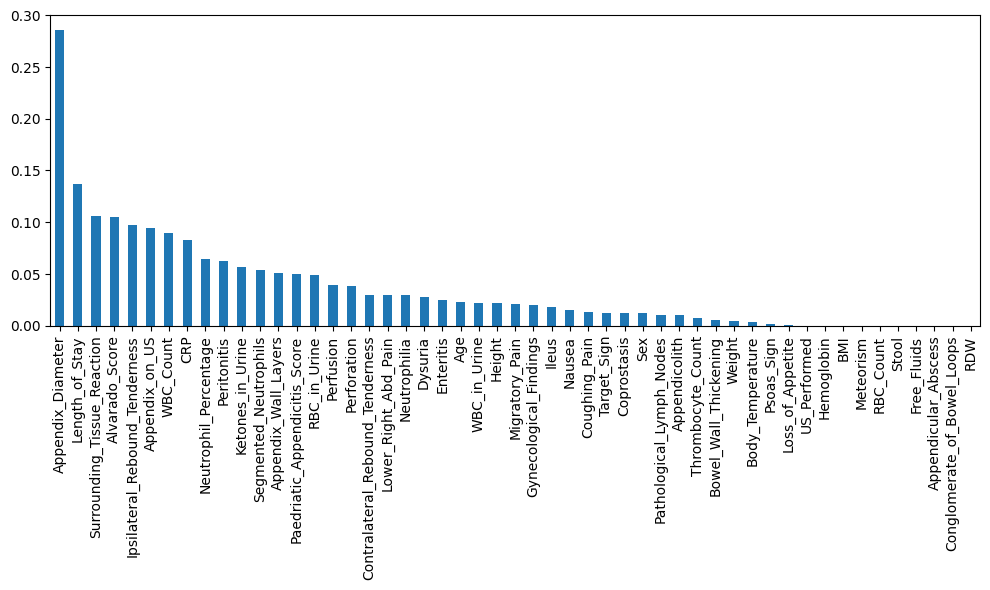

In [79]:
data_unrestricted = X[demographic + scoring + clinical + laboratory + ultrasound]

importances = mutual_info_classif(data_unrestricted, y, random_state=123)
feat_importances = pd.Series(importances, X[demographic + scoring + clinical + laboratory + ultrasound].columns[0:len(X.columns)])

feat_importances_sorted = feat_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feat_importances_sorted.plot(kind="bar")
plt.tight_layout()
plt.show()

In [80]:
feat_importances_sorted = feat_importances.sort_values(ascending=False)
feat_importances_sorted.head(15)

Appendix_Diameter                 0.286111
Length_of_Stay                    0.136979
Surrounding_Tissue_Reaction       0.106102
Alvarado_Score                    0.104805
Ipsilateral_Rebound_Tenderness    0.097220
Appendix_on_US                    0.094786
WBC_Count                         0.089195
CRP                               0.082590
Neutrophil_Percentage             0.064256
Peritonitis                       0.062214
Ketones_in_Urine                  0.056557
Segmented_Neutrophils             0.053968
Appendix_Wall_Layers              0.051224
Paedriatic_Appendicitis_Score     0.050010
RBC_in_Urine                      0.048951
dtype: float64

For modeling we chose the following variables:
- Appendix_Diameter
- Length_of_Stay
- Surrounding_Tissue_Reaction
- Alvarado_Score
- Ipsilateral_Rebound_Tenderness
- Appendix_on_US
- WBC_Count
- CRP

# Plotting the most important Variables (Mutual Information)

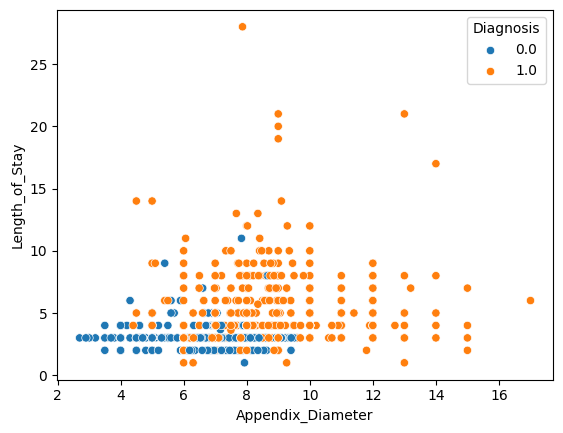

In [81]:
# Most important variables of the unrestricted subset and their relationship to Diagnosis
sns.scatterplot(data=data, x="Appendix_Diameter", y="Length_of_Stay", hue="Diagnosis")

plt.legend(title='Diagnosis')

plt.show()

The plot indicates that the variables Appendix_Diameter and Length_of_Stay are good predictors of Diagnosis. A larger diameter of the appendix and longer hospital stays are associated with appendicitis.

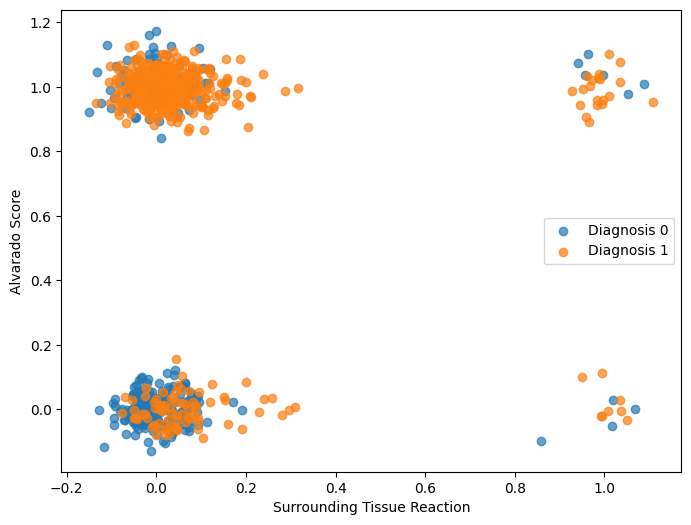

In [82]:
# Surrounding_Tissue_Reaction and Alvarado_Score and their relationship to Diagnosis
colors = {0: '#2278b5', 1: '#fc7f11'}

# Added to jitter for better visibility
jitter_X = np.random.normal(loc=0, scale=0.05, size=len(data["Surrounding_Tissue_Reaction"]))
jitter_Y = np.random.normal(loc=0, scale=0.05, size=len(data["Alvarado_Score"]))

plt.figure(figsize=(8, 6))

for category, color in colors.items():
    plt.scatter(data.loc[data["Diagnosis"] == category, "Ipsilateral_Rebound_Tenderness"] + jitter_X[data["Diagnosis"] == category],
                data.loc[data["Diagnosis"] == category, "Appendix_on_US"] + jitter_Y[data["Diagnosis"] == category],
                color=color, label=f'Diagnosis {category}', alpha=0.7)


plt.xlabel('Surrounding Tissue Reaction')
plt.ylabel('Alvarado Score')
plt.legend()
plt.show()

A positive Surrounding_Tissue_Reaction is more often associated with appendicitis, while higher Alvarado scores are more frequently observed in cases of appendicitis

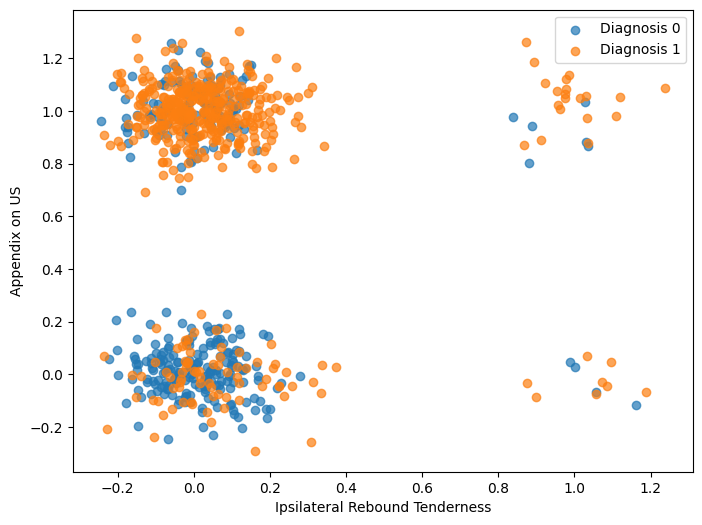

In [83]:
colors = {0: '#2278b5', 1: '#fc7f11'}

# Added to jitter for better visibility
jitter_X = np.random.normal(loc=0, scale=0.1, size=len(data["Ipsilateral_Rebound_Tenderness"]))
jitter_Y = np.random.normal(loc=0, scale=0.1, size=len(data["Appendix_on_US"]))

plt.figure(figsize=(8, 6))

for category, color in colors.items():
    plt.scatter(data.loc[data["Diagnosis"] == category, "Ipsilateral_Rebound_Tenderness"] + jitter_X[data["Diagnosis"] == category],
                data.loc[data["Diagnosis"] == category, "Appendix_on_US"] + jitter_Y[data["Diagnosis"] == category],
                color=color, label=f'Diagnosis {category}', alpha=0.7)


plt.xlabel('Ipsilateral Rebound Tenderness')
plt.ylabel('Appendix on US')
plt.legend()
plt.show()

Ipsilateral rebound tenderness is more often associated with appendicitis. If the appendix is detected during a sonographic examination (appendix on US), the patient is more likely to be diagnosed with appendicitis

# Unsupervised Feature Selection

We also employed an unsupervised method of feature selection, namely Principal Component Analysis (PCA). However, ultimately, we refrained from selecting variables based on this approach, as the Principal Components failed to adequately explain a large amount of the variance in the data. The variance of the first principal component is approximately 0.1, with subsequent components exhibiting progressively lower values.

## Principal Component Analysis

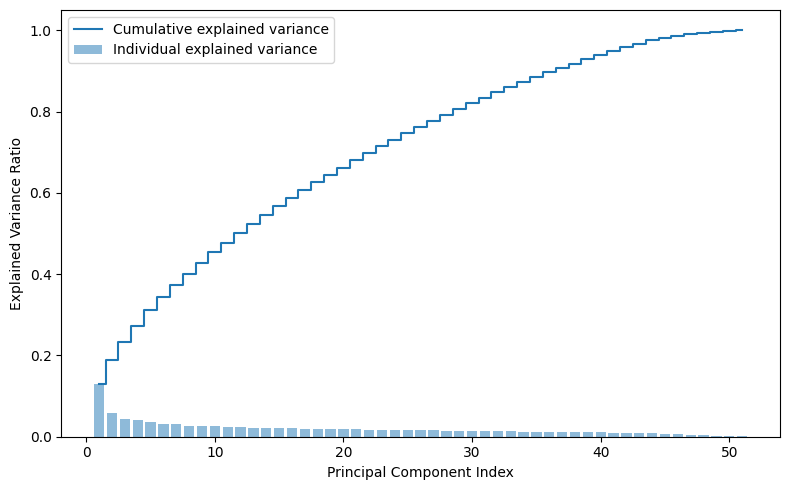

In [84]:
# Create a pipeline to standardize data and then apply PCA
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA())
])

X_pca = pipeline.fit_transform(X)

# The explained_variance_ratio_ gives us the variance contributed by each of the components
explained_variance = pipeline.named_steps['pca'].explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance) + 1),
        explained_variance, alpha=0.5,
        align='center', label='Individual explained variance')
plt.step(range(1, len(explained_variance) + 1),
         np.cumsum(explained_variance),
         where='mid', label='Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component Index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

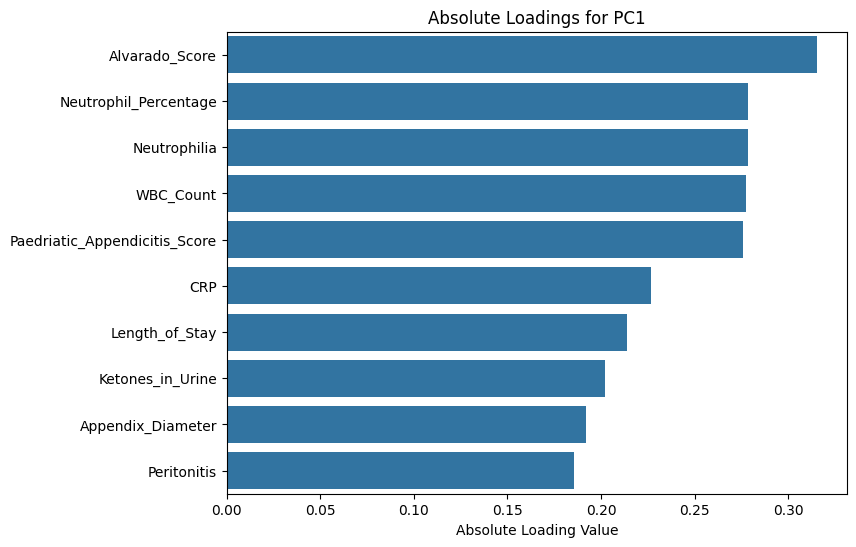

In [85]:
# Loadings of Principal Components
loadings = pipeline.named_steps['pca'].components_
n_components = 1

# df with loadings
loadings_df = pd.DataFrame(loadings[:n_components], columns=X.columns)
loadings_df = loadings_df.T

loadings_pc1 = loadings_df.iloc[:, 0].abs().sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 6))
sns.barplot(x=loadings_pc1.values, y=loadings_pc1.index)

plt.title('Absolute Loadings for PC1')
plt.xlabel('Absolute Loading Value')
plt.ylabel('')
plt.show()

The loadings of the first principal component suggest different variables compared to the mutual information method. These methods yield different results because PCA focuses on identifying variables that explain the highest amount of variability in the dataset, while mutual information relies on entropy.

# Outlier Detection

We plot outliers to detect variables with extreme values, which need adjustment in our modeling process. In total, we identified 15 continuous variables with the potential for extreme outliers.

In [86]:
continuous_variables = [
    "Age",
    "Height",
    "Weight",
    "BMI",
    "Length_of_Stay",
    "Body_Temperature",
    "WBC_Count",
    "RBC_Count",
    "Hemoglobin",
    "RDW",
    "Thrombocyte_Count",
    "Neutrophil_Percentage",
    "Segmented_Neutrophils",
    "CRP",
    "Appendix_Diameter"
]

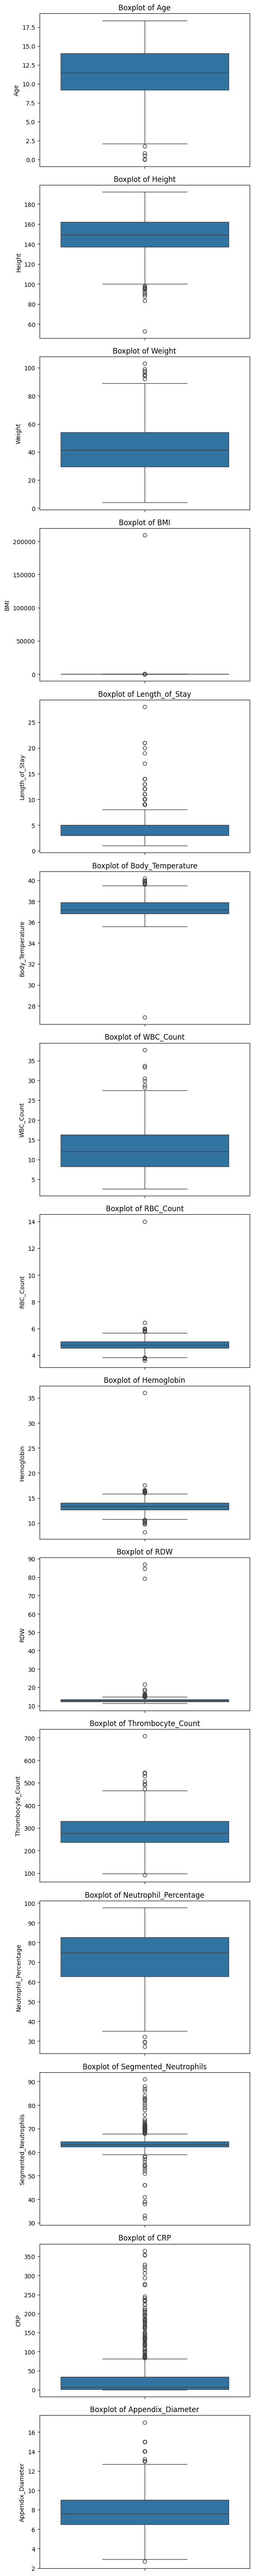

In [87]:
# Boxplots for all continuous variables
fig, axes = plt.subplots(nrows=len(continuous_variables), figsize=(6, 4 * len(continuous_variables)))

for i, var in enumerate(continuous_variables):
    sns.boxplot(data[var], ax=axes[i])
    axes[i].set_title(f'Boxplot of {var}')

plt.tight_layout()
plt.show()

The plots reveal several variables with extreme outliers that require adjustment in the modeling process:
- BMI
- Body Temperature
- RBC Count
- Hemoglobin
- RDW
- CRP
- Segmented Neutrophils